In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

In [2]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [3]:
df1.groupby('time').x.mean()

time
one    5.726669
two    7.296448
Name: x, dtype: float64

In [7]:
df1.groupby('group').x.mean()

group
a    4.768225
b    8.326049
Name: x, dtype: float64

In [4]:
df1.pivot_table('x', 'group', 'time')

time,one,two
group,,
a,5.084092,2.936197
b,10.026997,8.065904


In [9]:
pd.crosstab(df1.group, df1.time)

time,one,two
group,,
a,87,15
b,13,85


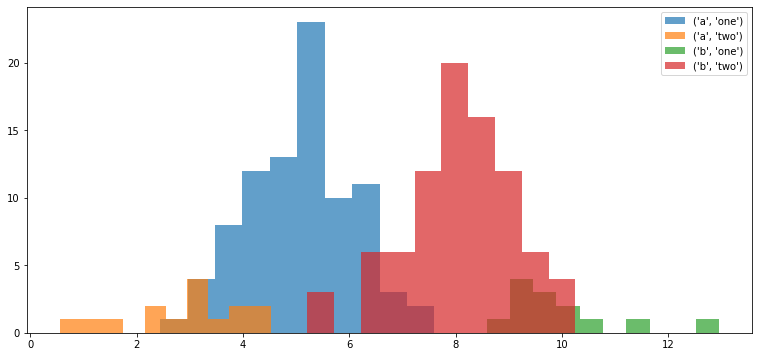

In [5]:
fig, ax = plt.subplots(figsize=(13, 6))

for g, x in df1.groupby(['group', 'time']).x:
    ax.hist(x, label=str(g), alpha=.7)
ax.legend()

In [10]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


<AxesSubplot:xlabel='x', ylabel='y'>

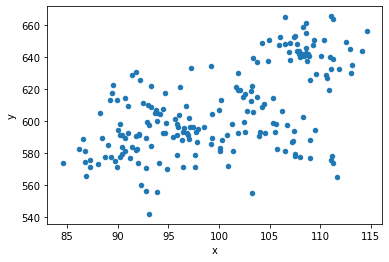

In [11]:
df2.plot.scatter('x', 'y')

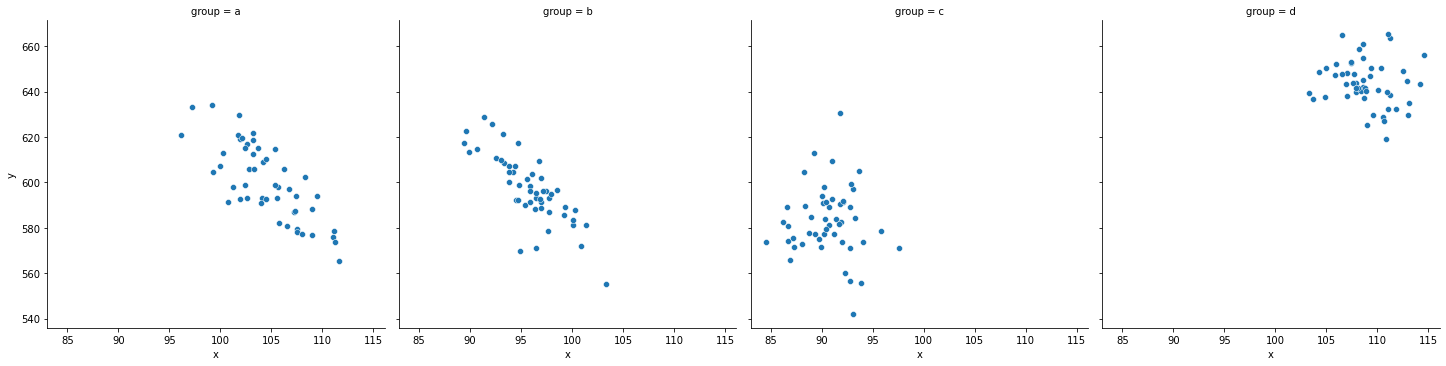

In [13]:
sns.relplot(data=df2, y='y', x='x', col='group')

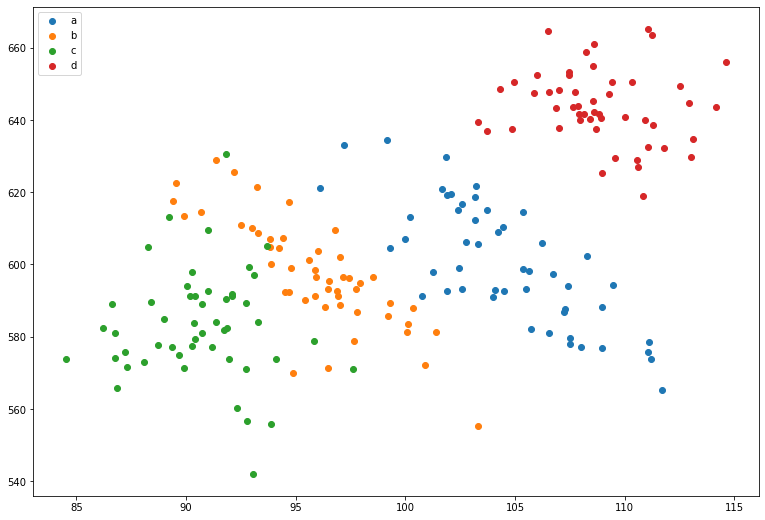

In [12]:
plt.figure(figsize=(13, 9))
for g, subset in df2.groupby('group'):
    plt.scatter(subset.x, subset.y, label=g)
plt.legend()

In [14]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


In [15]:
df3.groupby('surgeon').success.mean()

surgeon
A    0.877083
B    0.723077
Name: success, dtype: float64

<AxesSubplot:xlabel='surgeon'>

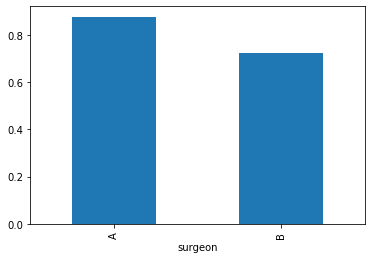

In [16]:
df3.groupby('surgeon').success.mean().plot.bar()

In [17]:
df3.pivot_table('success', 'surgeon', 'surgery')

surgery,appendectomy,heart bypass
surgeon,,
A,0.934383,0.656566
B,0.931373,0.672249


In [18]:
df3.pivot_table('success', 'surgeon', 'surgery', aggfunc=lambda x: x.size)

surgery,appendectomy,heart bypass
surgeon,,
A,381,99
B,102,418


Simpson's Paradox

- when the direction of a relationship between two variables reverses itself when controlling for a third variable

Takeaways:
    
- visualize your data
- visualize the interaction of multiple variables together
- be careful about assumptions around group membership